In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tweets = pd.read_csv('lks_rtwts.csv')
tweets

,tweet_id,text,retweets,likes
0,205888692580126720,#radensaleh not myth learn life bring kids gal...,0,1
1,207430942028079104,new bmw 3 series awarded 5 stars euro ncap cra...,0,2
2,208204757779759105,bmw hand 200 electric vehicles olympics,0,1
3,208283774251831296,asked sauber info images split car said shows ...,1,3
4,208342777627549696,racky think im driving bmw something,0,0
...,...,...,...,...
450,209938458611941376,free black bmw choice curious visit,0,0
451,208968123179741184,1980 bmw r100rs cafe racer via,0,0
452,210234207379800064,agree money not buy happiness somehow comforta...,0,0
453,209609738441334784,bmw r100 7 4h10 paris via,0,0


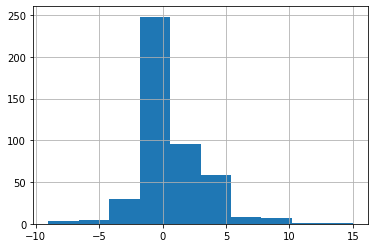

In [3]:
'''calulating polarity scores using Afinn library'''

from afinn import Afinn
afinn = Afinn()
def polarity(text):
    return afinn.score(text)

tweets['polarity_score'] = tweets['text'].\
    apply(lambda x: polarity(x))
tweets['polarity_score'].hist()

In [4]:
tweets       # showing tweets' info with their polarity scores

,tweet_id,text,retweets,likes,polarity_score
0,205888692580126720,#radensaleh not myth learn life bring kids gal...,0,1,-1.0
1,207430942028079104,new bmw 3 series awarded 5 stars euro ncap cra...,0,2,1.0
2,208204757779759105,bmw hand 200 electric vehicles olympics,0,1,0.0
3,208283774251831296,asked sauber info images split car said shows ...,1,3,0.0
4,208342777627549696,racky think im driving bmw something,0,0,0.0
...,...,...,...,...,...
450,209938458611941376,free black bmw choice curious visit,0,0,2.0
451,208968123179741184,1980 bmw r100rs cafe racer via,0,0,0.0
452,210234207379800064,agree money not buy happiness somehow comforta...,0,0,5.0
453,209609738441334784,bmw r100 7 4h10 paris via,0,0,0.0


<BarContainer object of 3 artists>

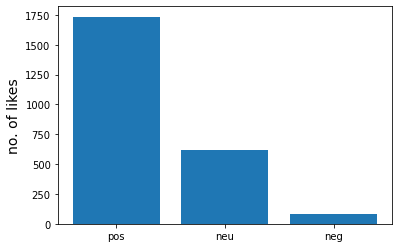

In [5]:
lks = []         # to store no. of likes with their sentiments

for i in range(455):
    
    if tweets.loc[i]['polarity_score'] > 0:
        lks = lks + ['pos'] * tweets.loc[i]['likes']
        
    if tweets.loc[i]['polarity_score'] == 0:
        lks = lks + ['neu'] * tweets.loc[i]['likes']
        
    if tweets.loc[i]['polarity_score'] < 0:
        lks = lks + ['neg'] * tweets.loc[i]['likes']
        
        
from collections import Counter
counter = Counter(lks)
most = counter.most_common()

x, y = [], []
for word,count in most:
    x.append(word)
    y.append(count)

plt.ylabel('no. of likes', fontsize=14)
plt.bar(x,y)     # no. of likes vs sentiments of those tweets

<BarContainer object of 10 artists>

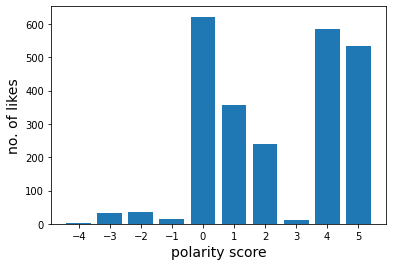

In [6]:
lks_afn_scr = []        # to store no. of likes with their polarity scores

for i in range(455):
    for j in range(-5,6):
        if tweets.loc[i]['polarity_score'] == j:
            lks_afn_scr = lks_afn_scr + [j] * tweets.loc[i]['likes']
            break

most = Counter(lks_afn_scr).most_common()

x, y = [], []
for score,count in most:
    x.append(score)
    y.append(count)
    
plt.ylabel('no. of likes', fontsize=14)
plt.xlabel('polarity score', fontsize=14)
plt.xticks(list(range(-5,6)))
plt.bar(x,y)      # no. of likes vs polarity score of those tweets

<BarContainer object of 3 artists>

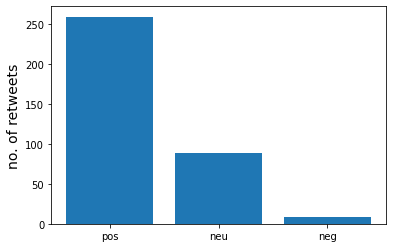

In [7]:
rtwts = []      # to store no. of retweets with their sentiments

for i in range(455):
    
    if tweets.loc[i]['polarity_score'] > 0:
        rtwts = rtwts + ['pos'] * tweets.loc[i]['retweets']
        
    if tweets.loc[i]['polarity_score'] == 0:
        rtwts = rtwts + ['neu'] * tweets.loc[i]['retweets']
        
    if tweets.loc[i]['polarity_score'] < 0:
        rtwts = rtwts + ['neg'] * tweets.loc[i]['retweets']
        
        
most = Counter(rtwts).most_common()

x, y = [], []
for word,count in most:
    x.append(word)
    y.append(count)

plt.ylabel('no. of retweets', fontsize=14)
plt.bar(x,y)     # no. of retweets vs sentiments of those tweets

<BarContainer object of 9 artists>

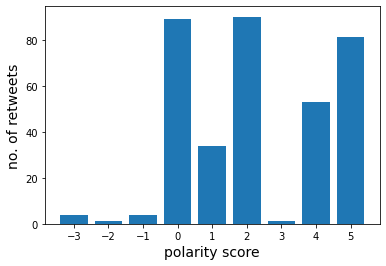

In [8]:
rtwts_afn_scr = []        # to store no. of retweets with thier polarity scores

for i in range(455):
    for j in range(-5,6):
        if tweets.loc[i]['polarity_score'] == j:
            rtwts_afn_scr = rtwts_afn_scr + [j] * tweets.loc[i]['retweets']
            break
            
most = Counter(rtwts_afn_scr).most_common()

x, y = [], []
for score,count in most:
    x.append(score)
    y.append(count)
    
plt.ylabel('no. of retweets', fontsize=14)
plt.xlabel('polarity score', fontsize=14)
plt.xticks(list(range(-5,6)))
plt.bar(x,y) # no. of retweets vs polarity score of those tweets